## LABORATORY 03: DATA SCIENCE - CUSTOMER DATA ANALYSIS

### 1. Metadata

* Data Science problem  
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.  

* Definition of variables    
   
      
    - People  
   
| Variable        | Description                                      |
|-----------------|--------------------------------------------------|
| ID              | Customer's unique identifier                     |
| Year_Birth      | Customer's birth year                            |
| Education       | Customer's education level                       |
| Marital_Status  | Customer's marital status                        |
| Income          | Customer's yearly household income              |
| Kidhome         | Number of children in customer's household       |
| Teenhome        | Number of teenagers in customer's household      |
| Dt_Customer     | Date of customer's enrollment with the company   |
| Recency         | Number of days since customer's last purchase    |
| Complain        | 1 if the customer complained in the last 2 years, 0 otherwise |  
  
    - Products  
   
| Variable          | Description                                      |
|-------------------|--------------------------------------------------|
| MntWines          | Amount spent on wine in last 2 years             |
| MntFruits         | Amount spent on fruits in last 2 years           |
| MntMeatProducts   | Amount spent on meat in last 2 years             |
| MntFishProducts   | Amount spent on fish in last 2 years             |
| MntSweetProducts  | Amount spent on sweets in last 2 years           |
| MntGoldProds      | Amount spent on gold in last 2 years             |  
   
    - Promotion  
   
| Variable             | Description                                      |
|----------------------|--------------------------------------------------|
| NumDealsPurchases    | Number of purchases made with a discount         |
| AcceptedCmp1         | 1 if customer accepted the offer in the 1st campaign, 0 otherwise |
| AcceptedCmp2         | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise |
| AcceptedCmp3         | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise |
| AcceptedCmp4         | 1 if customer accepted the offer in the 4th campaign, 0 otherwise |
| AcceptedCmp5         | 1 if customer accepted the offer in the 5th campaign, 0 otherwise |
| Response             | 1 if customer accepted the offer in the last campaign, 0 otherwise |  
   
    - Purchase  
   
| Variable             | Description                                      |
|----------------------|--------------------------------------------------|
| NumWebPurchases      | Number of purchases made through the company’s website |
| NumCatalogPurchases  | Number of purchases made using a catalogue       |
| NumStorePurchases    | Number of purchases made directly in stores      |
| NumWebVisitsMonth    | Number of visits to company’s website in the last month |   

    - Country  

The city of Russia where succeed the purchase   
  

### 2. Data Collection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
# load dataset
dataset = pd.read_csv("dataset/marketing_campaign.csv")
dataset = dataset.iloc[:, 1:-1]
dataset.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Country
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,Novosibirsk
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,Krasnodar
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,Novosibirsk
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,Moscow
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,Moscow


In [3]:
# print dataset dimensionality
def get_dimensionality(data):        
    print(f"#samples = {data.shape[0]}")
    print(f"#features = {data.shape[1]}")

In [4]:
get_dimensionality(dataset)

#samples = 2240
#features = 30


In [5]:
# manage metadata
def get_metadata(data):
    metadata = {}
    metadata["numerical"] = data.select_dtypes(include = ["float64", "int64"]).columns.tolist()
    metadata["categorical"] = data.select_dtypes(include = ["object"]).columns.tolist()
    print("Numerical features: ", metadata["numerical"])
    print("Categorical features: ", metadata["categorical"])
    
    return metadata

In [6]:
get_metadata(dataset)

Numerical features:  ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
Categorical features:  ['Education', 'Marital_Status', 'Dt_Customer', 'Country']


{'numerical': ['ID',
  'Year_Birth',
  'Income',
  'Kidhome',
  'Teenhome',
  'Recency',
  'MntWines',
  'MntFruits',
  'MntMeatProducts',
  'MntFishProducts',
  'MntSweetProducts',
  'MntGoldProds',
  'NumDealsPurchases',
  'NumWebPurchases',
  'NumCatalogPurchases',
  'NumStorePurchases',
  'NumWebVisitsMonth',
  'AcceptedCmp3',
  'AcceptedCmp4',
  'AcceptedCmp5',
  'AcceptedCmp1',
  'AcceptedCmp2',
  'Complain',
  'Z_CostContact',
  'Z_Revenue',
  'Response'],
 'categorical': ['Education', 'Marital_Status', 'Dt_Customer', 'Country']}

### 3. Filter missing values

In [7]:
def filter_missing(data):
    sbn.displot(
        data = data.isna().melt(value_name = "missing"),
        y = "variable",
        hue = "missing",
        multiple = "fill",
        aspect = 1.5
    )

    plt.show()
    cleaned_data = data.dropna()

    return cleaned_data

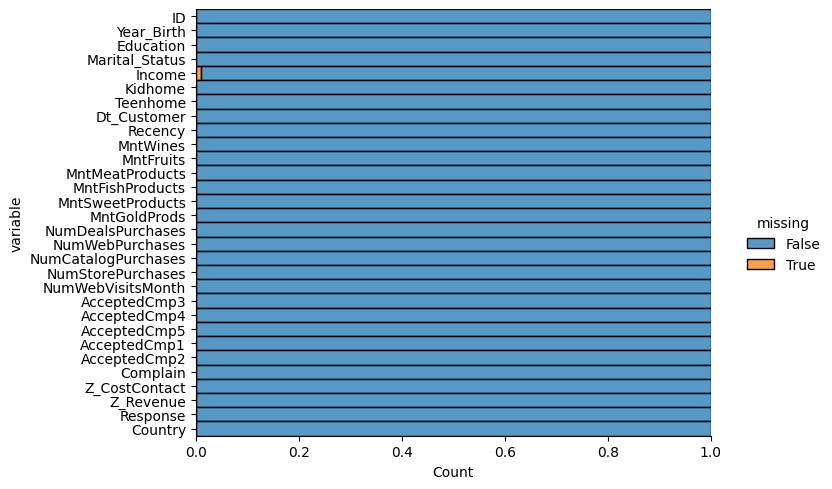

In [8]:
dataset = filter_missing(dataset)

In [9]:
print("New dimensionality after filtering")
get_dimensionality(dataset)

New dimensionality after filtering
#samples = 2216
#features = 30


### 4. Data Visualization for numerical variables

#### Histogram

In [10]:
variables = ["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"]

In [11]:
def hist_frequencies(data, variables, bins = 10):
    ncol_plots = 2
    nrow_plots = (len(variables) + ncol_plots - 1) // ncol_plots
    fig, ax = plt.subplots(nrow_plots, ncol_plots, figsize = (16, 4 * nrow_plots))
    ax = ax.flatten()
    colors = ["skyblue", "lightgreen", "salmon", "orange"]

    for i, col in enumerate(variables):
        sbn.histplot(data = data[col], ax = ax[i], color = colors[i], bins = bins)
        plt.xlabel(col)
        plt.ylabel("Frequencies")
        ax[i].set_title(f"Histogram of Frequencies for {col}", fontsize = 14)
        
    plt.tight_layout()
    plt.show()

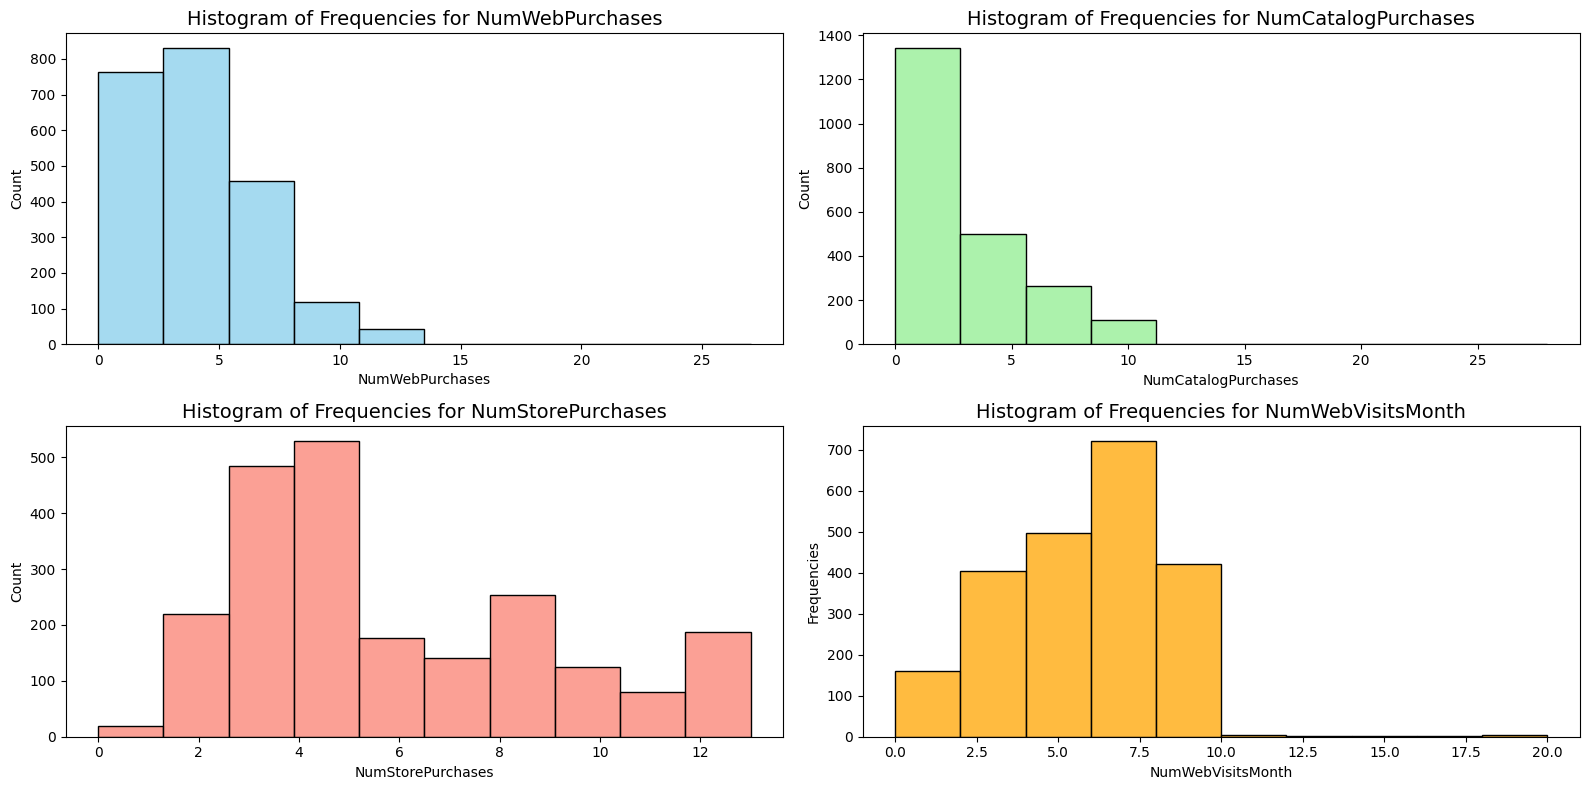

In [12]:
hist_frequencies(dataset, variables)

#### Bivariate charts

In [13]:
def bivariate_plots(data, x_var, y_var):
    ncol_plots = 2
    nrow_plots = (len(x_var) + ncol_plots - 1) // ncol_plots
    fig, ax = plt.subplots(nrow_plots, ncol_plots, figsize = (16, 4 * nrow_plots))
    ax = ax.flatten()
    colors = ["skyblue", "lightgreen", "salmon", "orange"]

    for i, col in enumerate(x_var):
        ax[i] = sbn.barplot(data = data, x = col, y = y_var, ax = ax[i], color = colors[i], errorbar = None)
        ax[i].bar_label(ax[i].containers[0], fontsize = 10)
        ax[i].set_title(f"{y_var} vs {col}", fontsize = 14)
        plt.xlabel(col)
        plt.ylabel(y_var)
        
    plt.tight_layout()
    plt.show()

Bivariants for Income

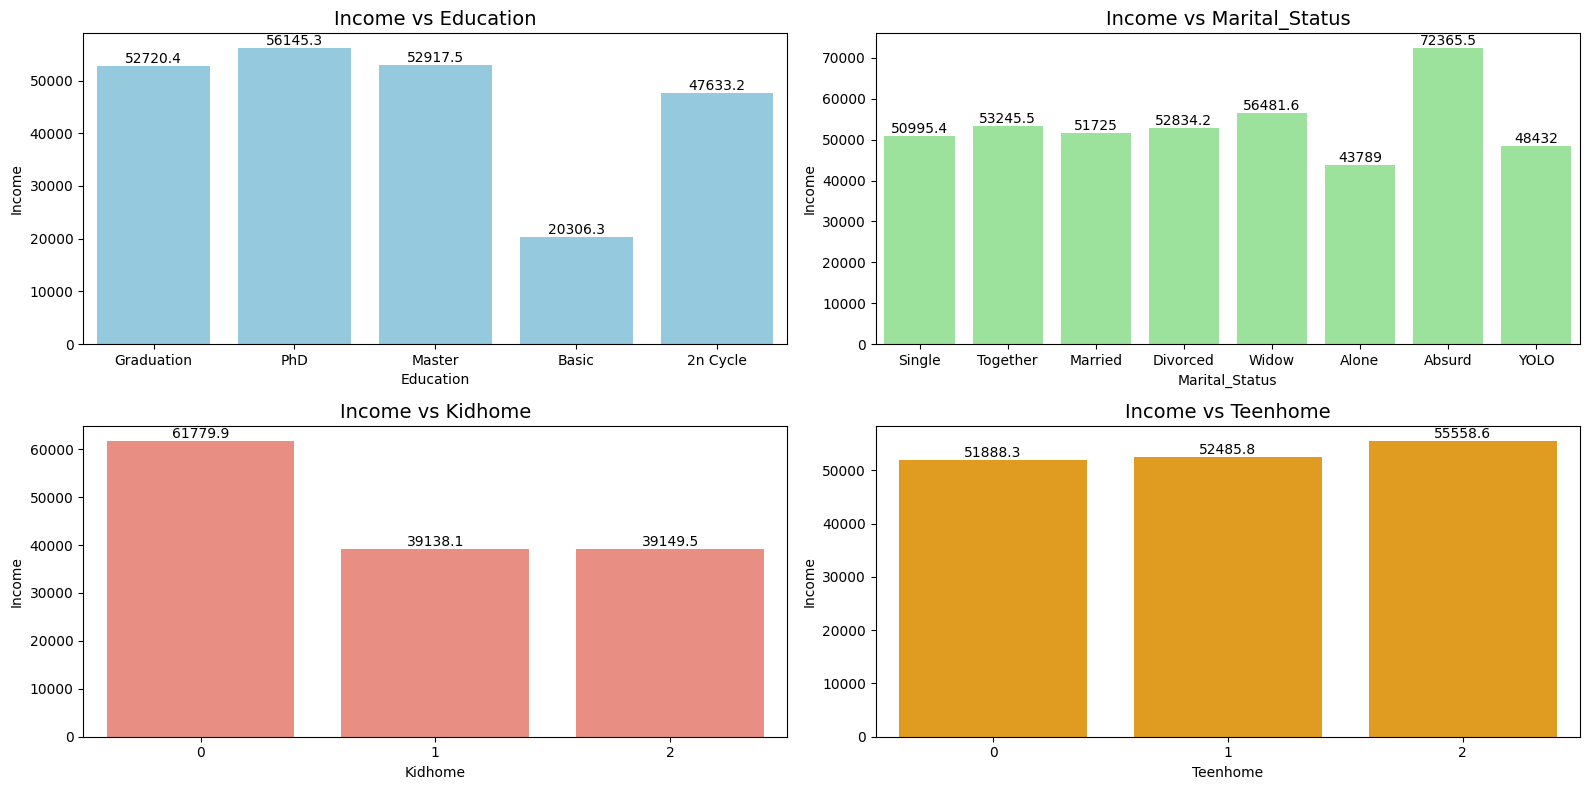

In [14]:
bivariate_plots(data = dataset, x_var = ["Education", "Marital_Status", "Kidhome", "Teenhome"], y_var = "Income")

#### Box Plot

In [15]:
def get_boxplot(data, x_var):
    ncol_plots = 2
    nrow_plots = (len(x_var) + ncol_plots - 1) // ncol_plots
    fig, ax = plt.subplots(nrow_plots, ncol_plots, figsize = (16, 4 * nrow_plots))
    ax = ax.flatten()
    colors = ["skyblue", "lightgreen", "salmon", "orange", "red", "purple"]

    for i, col in enumerate(x_var):
        sbn.boxplot(data = data, x = col, ax = ax[i], color = colors[i])
        ax[i].set_title(f"Box Plot for {col}", fontsize = 14)
        ax[i].set_xlabel(col)
        
    plt.tight_layout()
    plt.show()

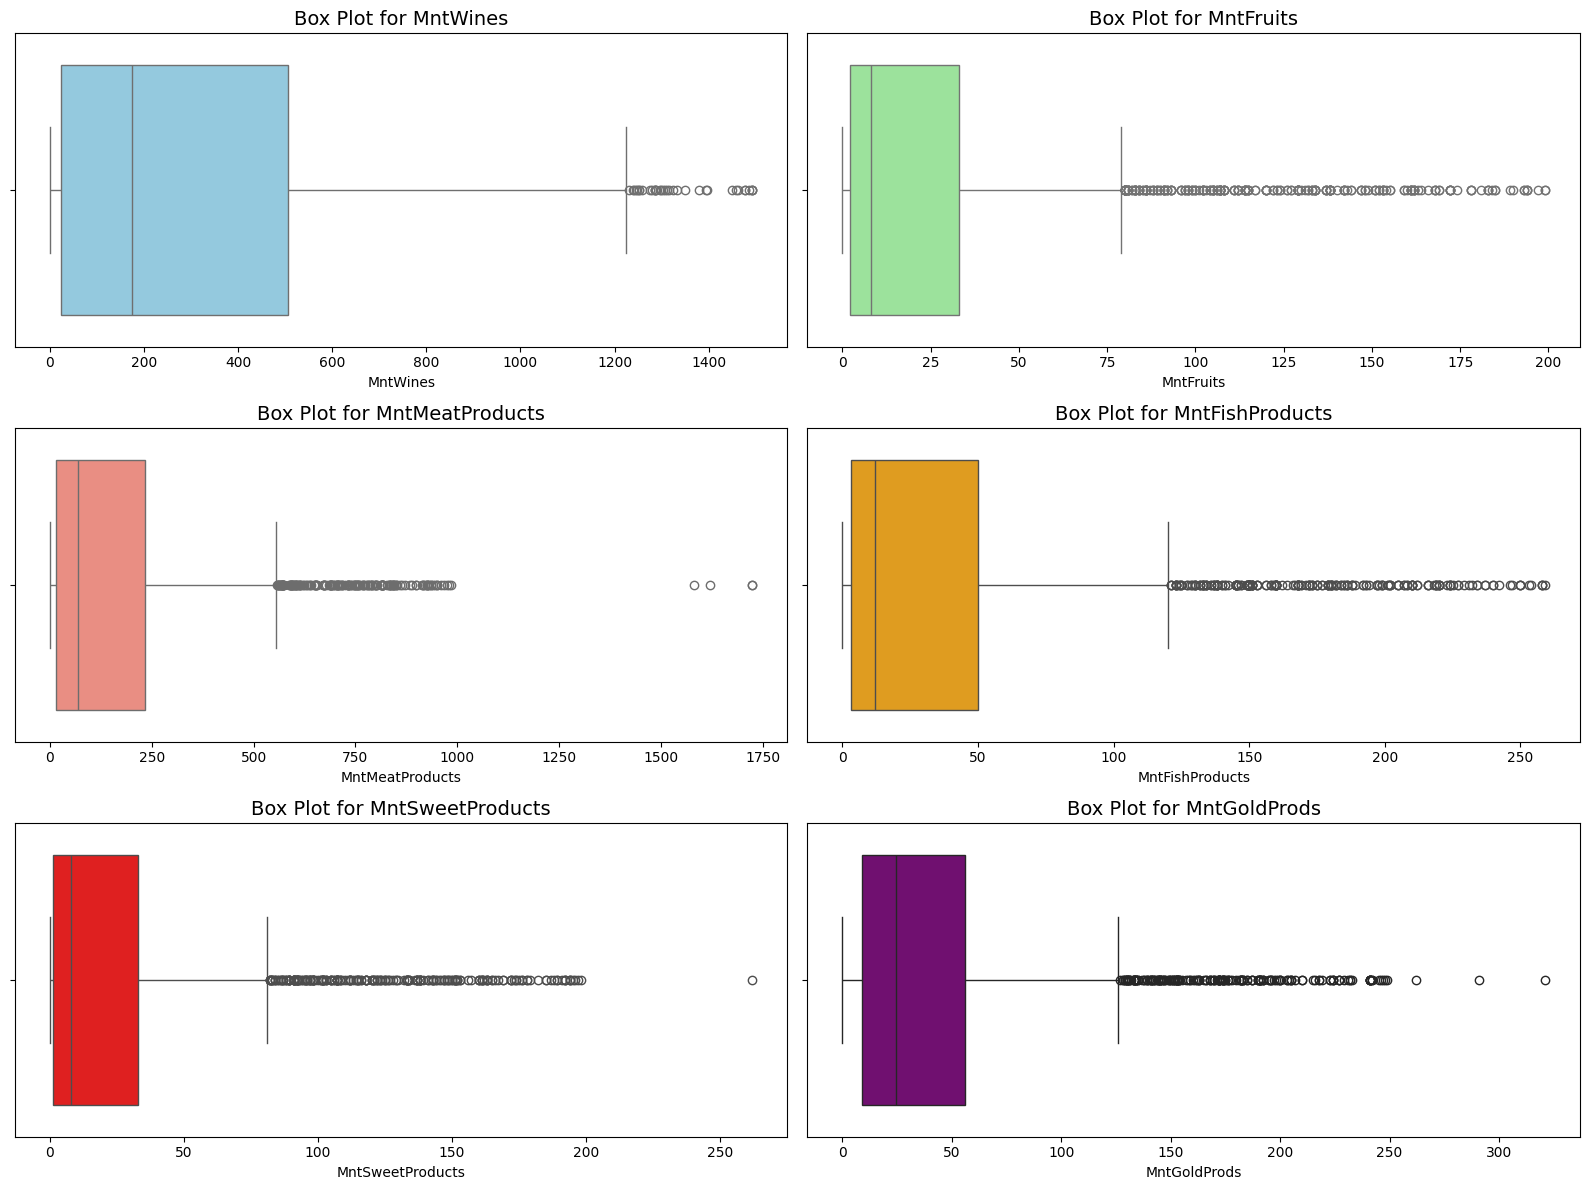

In [17]:
get_boxplot(data = dataset, x_var = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", 
                                        "MntSweetProducts", "MntGoldProds"])

#### Statistical Metrics

In [18]:
variables = ["Income", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"]
dataset[variables].describe()

,Income,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,4.085289,2.671029,5.800993,5.319043
std,25173.076661,2.740951,2.926734,3.250785,2.425359
min,1730.000000,0.000000,0.000000,0.000000,0.000000
25%,35303.000000,2.000000,0.000000,3.000000,3.000000
50%,51381.500000,4.000000,2.000000,5.000000,6.000000
75%,68522.000000,6.000000,4.000000,8.000000,7.000000
max,666666.000000,27.000000,28.000000,13.000000,20.000000


#### Correlation Analysis

The correlation between 2 variables quantify the linear relationship between the variables X and Y:  
$$ r = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y} $$   
Where:  
  
$r$: pearson correlation coefficient  
$Cov(x, y)$: covariance between variables X and Y. It measures how much the two variables change together.  
$\sigma_X, \sigma_Y$: standard deviations for variables X and Y.  

Formula of Covariance:  
$$ \text{Cov}(X, Y) = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y}) $$  
Formula for standard deviation for X:  
$$ \sigma_X = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})^2} $$  
Formula for standard deviation for Y:  
$$ \sigma_Y = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (Y_i - \bar{Y})^2} $$  

In [31]:
variables = ["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth", 
                "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", "Income"]

In [32]:
def plot_correlation(data, cols):
    corr = data[cols].corr()
    plt.matshow(corr, cmap = "coolwarm")
    plt.xticks(range(len(cols)), cols, rotation = 90)
    plt.yticks(range(len(cols)), cols)

    # add the correlation values in each cell
    for (i, j), val in np.ndenumerate(corr):
        plt.text(j, i, f"{val:.1f}", ha='center', va='center', color='black')
    plt.title("Correlation Analysis")
    plt.colorbar()    
    plt.show()

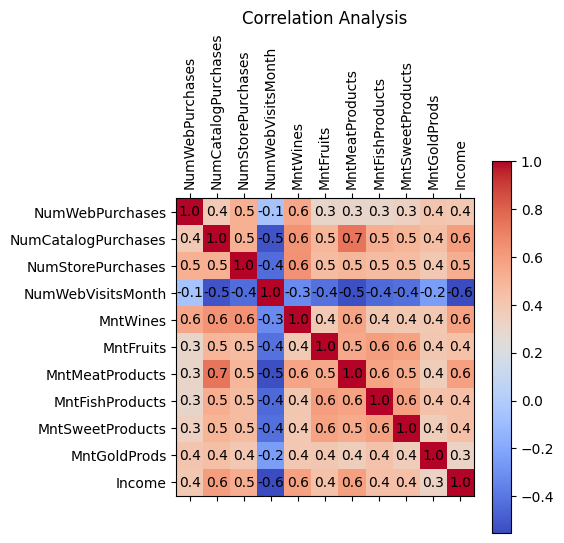

In [33]:
plot_correlation(dataset, variables)

Implications of Low Correlation

- **Independence of Features**:  
Low correlation suggests that the features are likely independent of each other. 
This can be beneficial because independent features provide unique information to the model, which can improve its performance.
- **Feature Redundancy**:   
When features are not correlated, it reduces the risk of redundancy. 
Including redundant features (highly correlated) can lead to issues like multicollinearity, making it difficult to interpret the model and possibly degrading its performance.

### 5. Data Visualization for categorical variables

In [36]:
variables = ["Education", "Marital_Status", "Country"]
variables

['Education', 'Marital_Status', 'Country']

Count instances for each categorical variable

In [37]:
for col in variables:
    print("\n***** " + col + " ******")
    print(dataset[col].value_counts())


***** Education ******
Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

***** Marital_Status ******
Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

***** Country ******
Country
Novosibirsk        482
Kazan              451
Sant Petersburg    442
Krasnodar          424
Moscow             417
Name: count, dtype: int64


Bar chart for absolute frequencies

In [38]:
def plot_barchart(dataset, col):
    results = dataset[col].value_counts()    
    ax = sbn.barplot(x = results.values.tolist(), y = results.index.tolist(), orient = "y")
    ax.bar_label(ax.containers[0], fontsize = 10, fmt = "%d")
    plt.title("Statistical analysis by " + col)
    plt.show()

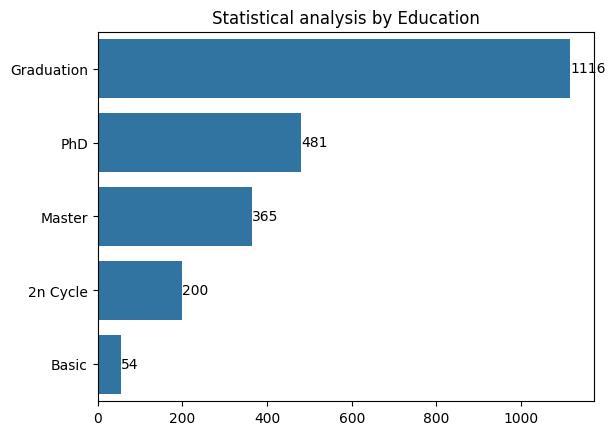

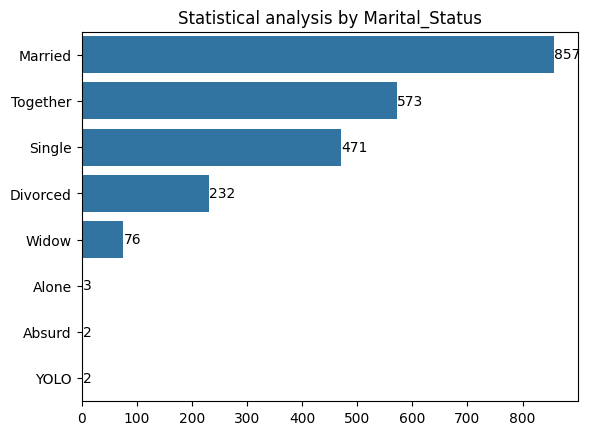

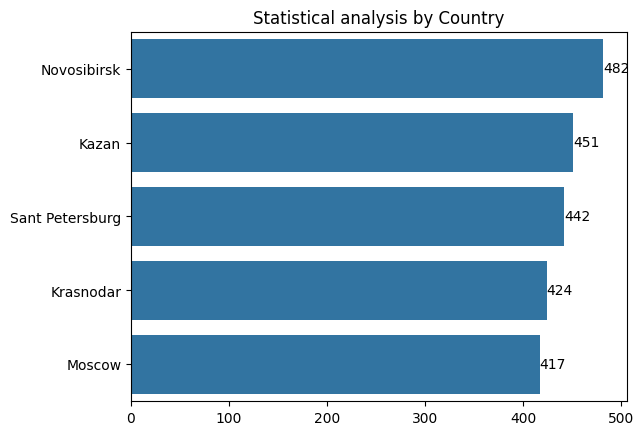

In [39]:
for col in variables:
    plot_barchart(dataset, col)

Pie chart for relative frequencies

In [40]:
def plot_piechart(dataset, col):
    # count the #samples for each categogy
    results = dataset[col].value_counts()
    # calculate the relative frequencies
    total_samples = results.sum()
    rel_freq = results/total_samples
    sbn.set_style("whitegrid")
    plt.figure(figsize=(6,6))
    plt.pie(rel_freq.values.tolist(), labels = rel_freq.index.tolist(), autopct='%1.1f%%')
    plt.title("Relative frequency analysis by " + col)
    plt.show()

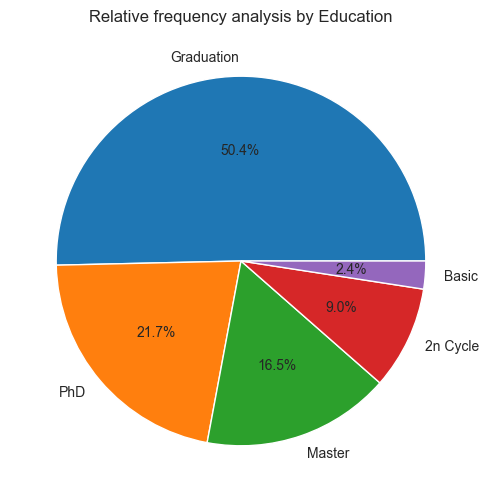

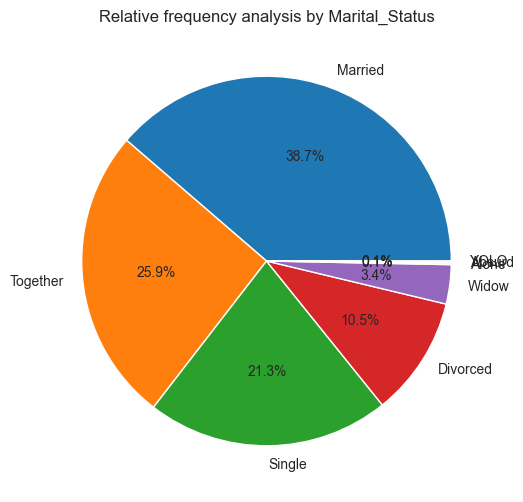

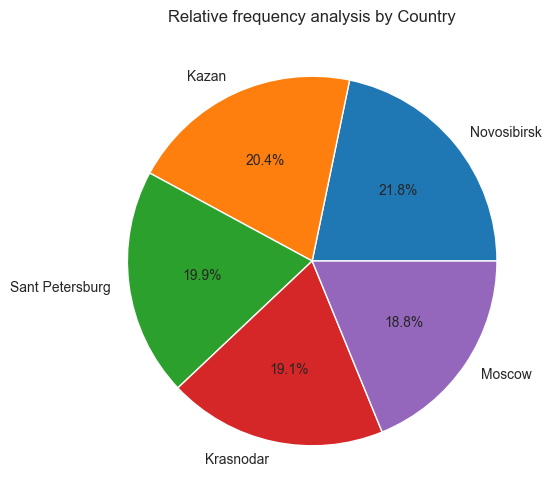

In [41]:
for col in variables:
    plot_piechart(dataset, col)

### 6. Statistical Analysis for subgroups

In [42]:
group01 = dataset.groupby(["Education", "Marital_Status"]).size().reset_index(name = "samples")
print(group01)

     Education Marital_Status  samples
0     2n Cycle       Divorced       23
1     2n Cycle        Married       80
2     2n Cycle         Single       36
3     2n Cycle       Together       56
4     2n Cycle          Widow        5
5        Basic       Divorced        1
6        Basic        Married       20
7        Basic         Single       18
8        Basic       Together       14
9        Basic          Widow        1
10  Graduation         Absurd        1
11  Graduation          Alone        1
12  Graduation       Divorced      119
13  Graduation        Married      429
14  Graduation         Single      246
15  Graduation       Together      285
16  Graduation          Widow       35
17      Master         Absurd        1
18      Master          Alone        1
19      Master       Divorced       37
20      Master        Married      138
21      Master         Single       75
22      Master       Together      102
23      Master          Widow       11
24         PhD          A

In [43]:
top10_group01 = group01.nlargest(10, "samples")

others_group01 = group01[~group01.index.isin(top10_group01.index)]["samples"].sum()
others_row = pd.DataFrame({
    "Education": ["Others"],
    "Marital_Status": ["Others"],
    "samples": [others_group01]
})

final_group01 = pd.concat([top10_group01, others_row], ignore_index=True)

print(final_group01)

     Education Marital_Status  samples
0   Graduation        Married      429
1   Graduation       Together      285
2   Graduation         Single      246
3          PhD        Married      190
4       Master        Married      138
5   Graduation       Divorced      119
6          PhD       Together      116
7       Master       Together      102
8          PhD         Single       96
9     2n Cycle        Married       80
10      Others         Others      415


Absolute frequency analysis

In [44]:
def plot_absfreq_groups(group, g1, g2):
    sbn.barplot(data = group, x = g1, y = "samples", hue = g2, palette = "pastel")
    plt.xlabel(g1)
    plt.ylabel('Absolute Frequencies')
    plt.title('Bar Chart of Absolute Frequencies')
    plt.tight_layout()
    plt.show()

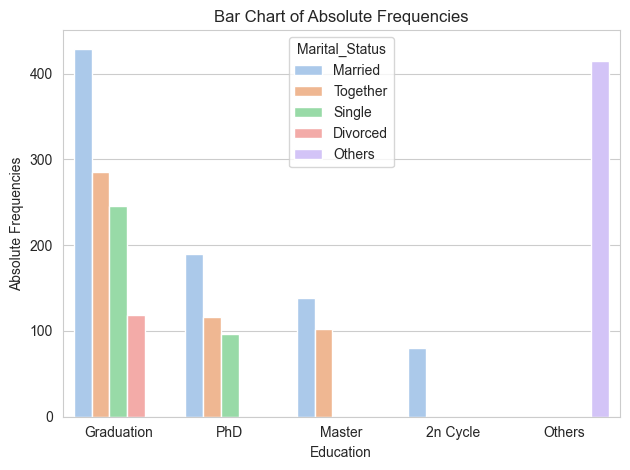

In [45]:
plot_absfreq_groups(final_group01, "Education", "Marital_Status")

Relative frequency analysis

In [46]:
def plot_relfreq_groups(group, g1, g2):
    labels = group[g1] + " with " + group[g2] + " condition"
    sizes = group["samples"]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Pie Chart of Relative Frequencies')
    plt.show()

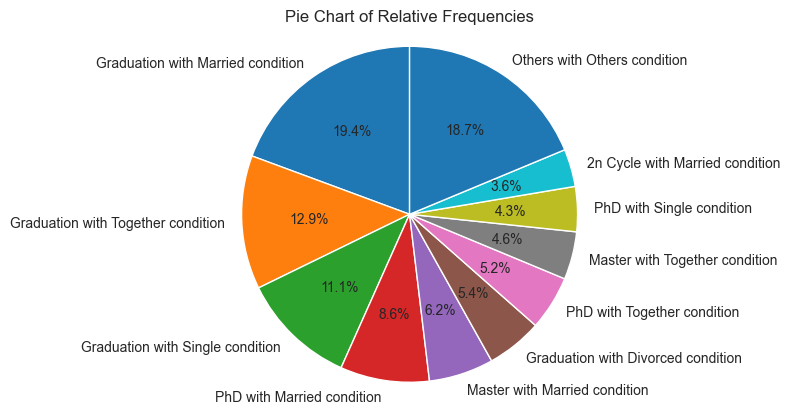

In [47]:
plot_relfreq_groups(final_group01, "Education", "Marital_Status")

### 7. Geographical Visualization

In [ ]:
import folium

cities = pd.read_csv("dataset/cities.csv")
cities = cities.dropna()

map_osm = folium.Map(location=[65.5907183,97.4981968], zoom_start=3)

for i, row in cities.iterrows():
    popup_text = f"<b>City:</b> {row['City']}<br><b>Ads:</b> {row['Ads']}"
    popup = folium.Popup(popup_text, max_width=250)

    folium.CircleMarker([row['Lat'], row['Long']],
                        radius=row['size'],
                        color=row['color'],
                        fill_color=row['color'],
                        popup = popup,
                        tooltip = f"Click for details"
                       ).add_to(map_osm)

map_osm.save("map.html")    
map_osm